In [35]:
import mysql.connector

from mysql.connector import Error

try:
  connection = mysql.connector.connect(host='localhost', database='mikoto',
                                       user='root',password='######',
                                       auth_plugin = 'mysql_native_password')
  if connection.is_connected():
    db_Info = connection.get_server_info()
    print("Connected to MySQL Server version ", db_Info)
    cursor = connection.cursor()
    cursor.execute("select database();")
    record = cursor.fetchone()
    print("Your connected to database: ", record)

except Error as e:
  print("Error while connecting to MySQL", e)

Connected to MySQL Server version  8.0.31
Your connected to database:  ('mikoto',)


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Count of sphipment status**

In [37]:
query_3 = ('SELECT s.shipment_status, COUNT(*) AS Count FROM shipment as s GROUP BY s.shipment_status;')
cursor.execute(query_3)  

In [38]:
record_3 = cursor.fetchall()

In [39]:
df = pd.DataFrame(record_3, columns = ['Shipment Status','count'])

In [40]:
df

,Shipment Status,count
0,Order Placed,193
1,Delivered,415
2,At Delivery Center,118
3,In-Transit,174


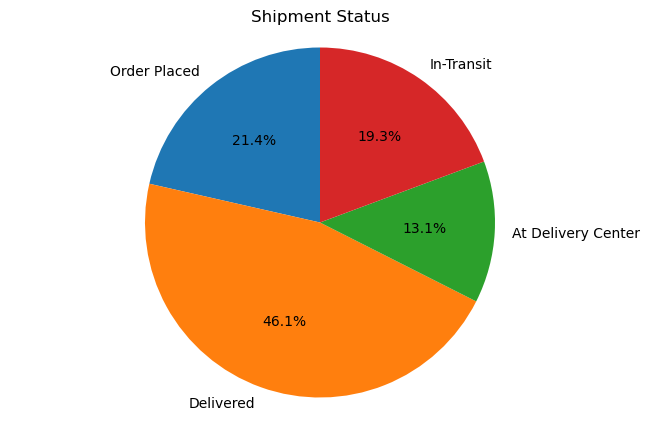

In [41]:
plt.figure(figsize=(8,5))
plt.title('Shipment Status') 
plt.pie(df['count'], labels=df['Shipment Status'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

**Warehouse - Avalable Storage Space**

In [42]:
query_5 = ('SELECT w.warehouse_id, w.available_storage_space FROM warehouse as W;')
cursor.execute(query_5)

In [43]:
record_5 = cursor.fetchall()

In [44]:
df = pd.DataFrame(record_5, columns = ['warehouse_id','available storage space'])

In [45]:
df

,warehouse_id,available storage space
0,1,9219
1,2,6330
2,3,9241
3,4,4845
4,5,5100
5,6,7475
6,7,2298
7,8,8248
8,9,3722
9,10,7991


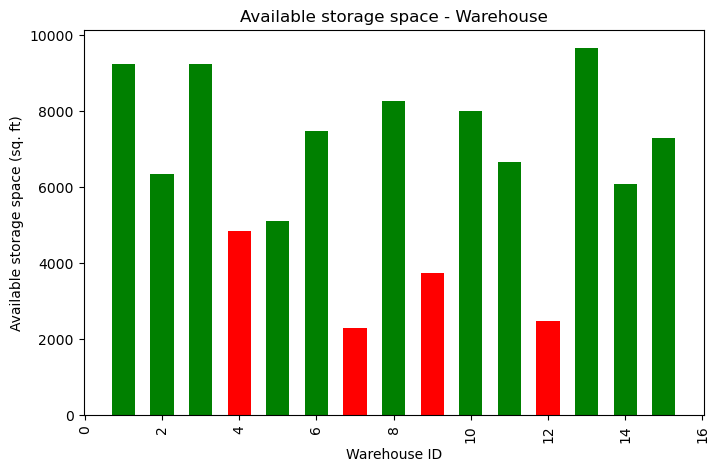

In [46]:
clrs = ['red' if (x < 5000) else 'green' for x in df['available storage space']]

plt.figure(figsize=(8,5))
plt.title('Available storage space - Warehouse') 
plt.bar(df['warehouse_id'], df['available storage space'], width=0.6, 
        bottom=None, align='center', color = clrs) 
plt.xlabel('Warehouse ID')
plt.xticks(rotation='vertical')
plt.ylabel('Available storage space (sq. ft)')
plt.show()

**Understanding customer payment methods**

In [47]:
query_7 = ('SELECT payment_method, card_type, COUNT(payment_id) AS payment_count FROM payment GROUP BY payment_method, card_type;')
cursor.execute(query_7)

In [48]:
record_7 = cursor.fetchall()

In [49]:
df = pd.DataFrame(record_7, columns = ['payment_method','card_type','payment_count'])

In [50]:
df

,payment_method,card_type,payment_count
0,Debit,American Express,66
1,Credit,American Express,72
2,Debit,Visa,60
3,Credit,Mastercard,50
4,Debit,Mastercard,75
5,Credit,Visa,77


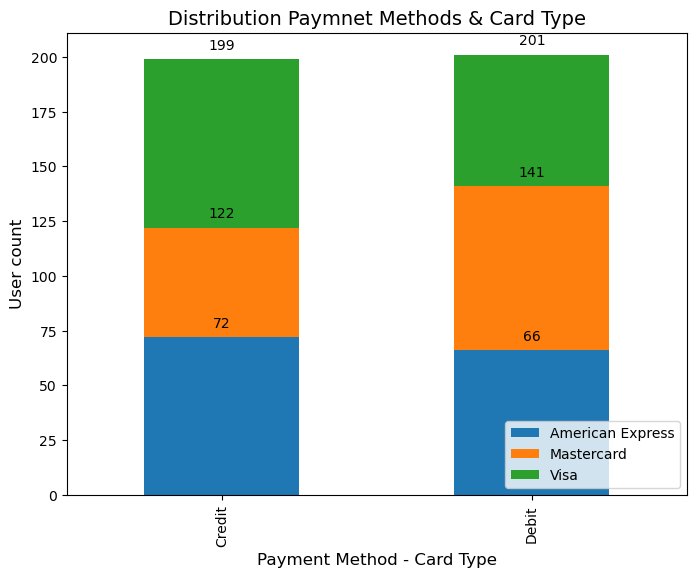

In [51]:
# pivot the data to create a multi-level index
df = df.pivot(index='payment_method', columns='card_type', values='payment_count')

# plot the stacked bar chart
ax = df.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add annotations
for c in ax.containers:
    ax.bar_label(c, label_type='edge', fontsize=10, padding=5)
    
# set the title and labels
ax.set_title('Distribution Paymnet Methods & Card Type', fontsize=14)
ax.set_xlabel('Payment Method - Card Type', fontsize=12)
ax.set_ylabel('User count', fontsize=12)

# Set legend position
ax.legend(loc='lower right')

# show the plot
plt.show()
